<a href="https://colab.research.google.com/github/Lawrence-Krukrubo/EDA/blob/master/model_development_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<u><h3>Learning Objectives Include:</h3></u>
    
    * Simple and Multiple Linear Regression
    * Model Evaluation using Visualization
    * Polynomial Regression and Pipelines
    * R-Squared and MSE for In-Sample Evaluation
    * Prediction and Decision Making
    
<h4>Question:-</h4>
    
   <h5>How can we determine a fair value for a used car?</h5>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
file_data = ''
with open('/content/gdrive/My Drive/Colab_Notebooks/IBM_cognitive_class_learning/adjusted_df.csv' ) as f:
    file_data = f.read()

In [ ]:
import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO

TESTDATA = StringIO(file_data)

adjusted_df = pd.read_csv(TESTDATA, sep=",")

adjusted_df.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price_binned
0,0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Low
1,1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Low
2,2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Low
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,Low
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,Low


The first column is unnecessary and should be dropped. Let's do so now

In [ ]:
adjusted_df = adjusted_df.iloc[:, 1:]

In [ ]:
adjusted_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price_binned
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Low
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Low
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Low
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,Low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,Low


In [ ]:
adjusted_df.shape

(201, 27)

Let's check the number of missing values in the data set

In [ ]:
adjusted_df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'price_binned'],
      dtype='object')

In [ ]:
adjusted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 27 columns):
symboling            201 non-null int64
normalized-losses    201 non-null object
make                 201 non-null object
fuel-type            201 non-null object
aspiration           201 non-null object
num-of-doors         201 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    201 non-null float64
horsepower           201 non-n

#### We need to do some data wrangling and distribution analysis

In [ ]:
# Let's clean the num-of-doors column or feature.

# Lets view the unque elements in this column and count of each unique element

adjusted_df.groupby('num-of-doors').size()

num-of-doors
four    115
two      86
dtype: int64

In [ ]:
# Next lets replace missing values to the mode, which is clearly four door cars

adjusted_df['num-of-doors'].replace('?','four', inplace=True)

# Next let's see the update
adjusted_df.groupby('num-of-doors').size()

num-of-doors
four    115
two      86
dtype: int64

#### Let's investigate the relationship between num-of-doors and price

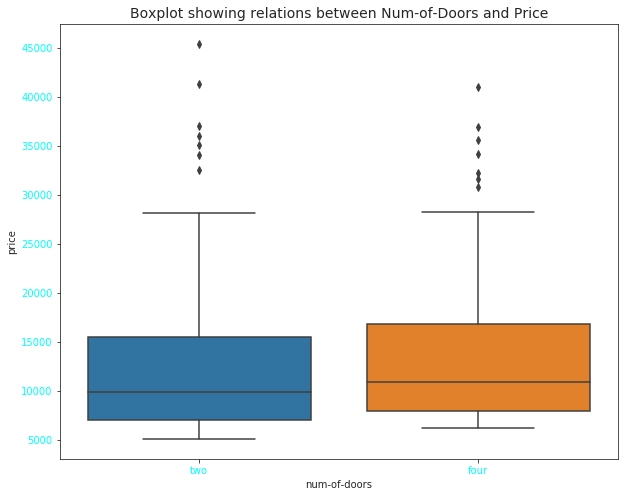

In [ ]:
plt.figure(figsize=(10,8))
sns.set_style('ticks')

plt.title('Boxplot showing relations between Num-of-Doors and Price', fontsize=14)
sns.boxplot('num-of-doors', 'price', data=adjusted_df)
plt.xticks(color='aqua')
plt.yticks(color='aqua')
#plt.xlabel(color='aqua')
#plt.ylabel(color='aqua')

plt.show()

In [ ]:
# Let's find the average price for two and four door vehicles

adjusted_df[['num-of-doors', 'price']].groupby('num-of-doors').mean()

,price
num-of-doors,
four,13498.034783
two,12818.127907


_**From the box plot above and the groupby() method above, we can see that there is little difference between a 4 door and 2 door vehicle. So the num-of-doors categorical variable is not a good indicator or predictor of the price of cars**_





#### Let's investigate the relationship between num-of-cylinders and price

In [ ]:
# first lets group the column and see the types and count of unique elements

adjusted_df.groupby('num-of-cylinders').size()

num-of-cylinders
eight       4
five       10
four      157
six        24
three       1
twelve      1
two         4
dtype: int64

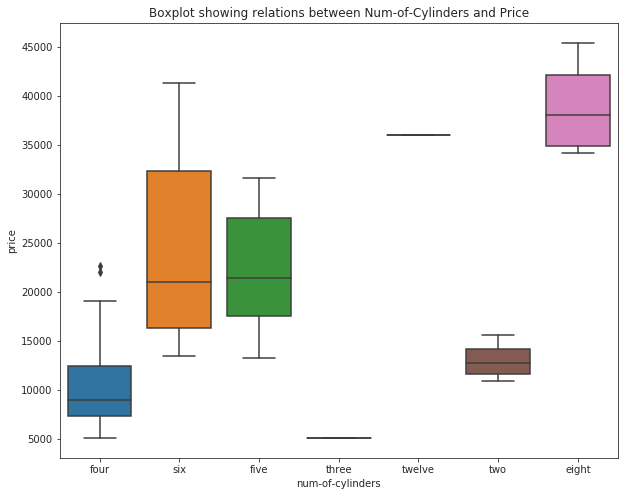

In [ ]:
# Let's create some boxplot visualization

plt.figure(figsize=(10,8))
plt.title('Boxplot showing relations between Num-of-Cylinders and Price')
sns.boxplot('num-of-cylinders', 'price', data=adjusted_df)
plt.show()

In [ ]:
adjusted_df[['num-of-cylinders','price']].groupby('num-of-cylinders').mean()

,price
num-of-cylinders,
eight,38900.000000
five,22007.600000
four,10303.197452
six,23671.833333
three,5151.000000
twelve,36000.000000
two,13020.000000


**From the box plot above and the groupby() method above, we can see that there is significant difference between the various num-of-cylinders variable, except 5 and 6 cylinders which are almost identical.**  
**So this categorical variable is possibly a good indicator or predictor of the price of cars**_




<h3>What is a Model?</h3>

**A model can be thought as a mathematical equation used to Predict a Value, given One or More other Values,**  
**Relating one or more independent variables or features to dependent variables.**

_Usually the more relevant data you have, the more accurate your model is_

<u><h3>Linear Regression and Multiple Linear Regression:</h3></u>

**Linear regression:** Refers to the use of one independent variable to make a prediction.  
**Multiple Linear Regression:** Refers to the use of multiple independent variables to make a prediction.

### Simple Linear Regression:  
$y = b_0 + b_1x$  


$y$ = **The dependent variable or target variable.**  
$x$ = **The independent variable or feature or the predictor.**  
$b_0$ = **The intercept or where the regression line meets the target variable y.**  
$b_1$ = **The slope.**



<u><h4>Process Summary for Simple Linear Regression</h4></u>  

* **We have a set of Training Points**.  
* **We use these Training Points to train or Fit the Model and get Parameters($b_0,b_1$).**  
* **We then use these parameters in the Model**  
* **We now have a model... and we put a hat on the y($y^$) to show the model is an estimate.**  
* **We can use this model to predict values that we have never seen.**  
* _**Don't forget that our model is not always correct... sometimes due to the noise in the data, or other factors.**_

<u><h3>Fitting a simple linear regression Model in Python</h3></u> 

* **Import Linear_model from scikit-learn.**  
*(from sklearn.linear_model import LinearRegression)*  


* **Create a Linear_regression object using the constructor.**  
_lm=LinearRegression()_  


* **We define the Predictr variable($X$) and Target variable($Y$).**  


* **Then use the method .fit() to fit the model and find parameters $b_0,b_1$.**  
_lm.fit(X,Y)_  


* **We can obtain a prediction using the .predict() method.**  
_Yhat = lm.predict(X)_  


* **The output is an array, which has the same number of samples as the input $X$.**  


* **The intercept $b_0$ is an attribute of the object** _lm_**. It is the value of $Y$ when $X$ is $0$.**<br>
*we can view the intercept by- lm.intercept_*  


* **The slope $b_1$ is also an attribute of the object** _lm_**. It is the value with which $Y$ changes due to 1 unit change in $X$**  
*we can view the slope by- lm.coef_*



<h4>let's create a simple linear regression model using highway-mpg to predict price</h4>

In [ ]:
# Step one_ importing scikit learn

from sklearn.linear_model import LinearRegression

In [ ]:
# Step two_ creating a linear_regression object 

lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
# Step threeA_ Defining X and Y, both or X must be in 2D or like a dataframe, not a series.

X = adjusted_df[['highway-mpg']]
Y = adjusted_df['price']

In [ ]:
# Step threeB_ lets fit the model to find our intercept(b0) and slope(b1)

lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
# Let's predict Y based on X

Yhat = lm.predict(X)
Yhat

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508, 17879.97140011, 17879.97140011, 17879.97140011,
       21988.63829172, 14593.03788682, 14593.03788682, 15414.77126514,
       15414.77126514, 17879.97140011, 20345.17153508, 20345.17153508,
       21988.63829172, -5128.5631929 ,  3088.77059031,  3088.77059031,
        4732.23734696,  7197.43748192, 13771.3045085 ,  7197.43748192,
        7197.43748192,  7197.43748192, 13771.3045085 , 13771.3045085 ,
       18701.70477843, -5950.29657123,  7197.43748192,  3910.50396864,
       10484.37099521, 10484.37099521, 10484.37099521, 10484.37099521,
       11306.10437353, 11306.10437353, 11306.10437353, 11306.10437353,
       15414.77126514, 12949.57113018, 14593.03788682, 14593.03788682,
       22810.37167004, 22810.37167004, 24453.83842668, 12949.57113018,
        7197.43748192,  7197.43748192,  7197.43748192,  7197.43748192,
       19523.43815675, 19523.43815675, 19523.43815675, 19523.43815675,
      

In [ ]:
# To view our intercept

intercept = lm.intercept_
intercept

38423.3058581574

In [ ]:
# To view the slope

slope = lm.coef_
slope

array([-821.73337832])

#### The relationship between Highway-mpg and Price is given by;  
<h3>$y = b_0 + b_1x$</h3> 
<h4>This is same as yhat(Price)  =  intercept  +  slope * Highway-mpg</h4>  
$Price(Yhat) = 38423.3059 + (-821.7334)* Highway-mpg(X)$

### Multiple Linear Regression

**This method is used to explain the relationship between:-**  
    **One continous Target variable(Y) and,**
    **Two or more Independent or Predictor variables(X).**

<u><h3>Fitting a Multiple Linear Regression Model in Python</h3></u> 

**1. Let's extract our multiple variables, for example:- horsepower, curb-weight, engine-size, highway-mpg.**

In [ ]:
predictors = adjusted_df[['horsepower','curb-weight','engine-size','highway-mpg']]
target = adjusted_df[['price']]

In [ ]:
predictors.head()

,horsepower,curb-weight,engine-size,highway-mpg
0,111,2548,130,27
1,111,2548,130,27
2,154,2823,152,26
3,102,2337,109,30
4,115,2824,136,22


In [ ]:
target.head()

,price
0,13495
1,16500
2,16500
3,13950
4,17450


**2. Let's train our model as before using the predictor and target variables.**

In [ ]:
dm = LinearRegression()

In [ ]:
dm.fit(predictors, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**3. We can also obtain a prediction using .predict() method.**

In [ ]:
y_hat = dm.predict(predictors)
y_hat[:10]

array([[13698.85778289],
       [13698.85778289],
       [19060.76025662],
       [10622.56954462],
       [15517.80397408],
       [13866.3588934 ],
       [15453.85157065],
       [15972.02425462],
       [17616.00370851],
       [10723.68588681],
       [10723.68588681],
       [17803.79147047],
       [18062.87781246],
       [19318.18046058],
       [26975.16641031],
       [27681.76552481],
       [28196.73880474],
       [  661.58360623],
       [ 5654.06306047],
       [ 5818.93618719],
       [ 5482.04322973],
       [ 5371.25425648],
       [ 8742.84597963],
       [ 5799.92438595],
       [ 5903.55892274],
       [ 5903.55892274],
       [ 9039.61760772],
       [11860.1657957 ],
       [18771.78037028],
       [ 4819.14470406],
       [ 5695.83675197],
       [ 4009.73430516],
       [ 6118.10807334],
       [ 6193.47864556],
       [ 6447.85432678],
       [ 6513.80357747],
       [ 9478.30849252],
       [ 9727.97351298],
       [ 9798.63342443],
       [10118.95835634],


**4. The intercept $b_0$ is an attribute of the object.**

In [ ]:
prd_intacpt = dm.intercept_ 
prd_intacpt

array([-15851.38131585])

**5. The slope $b_1$ is also an attribute of the object.**  
**Note that the slope or coefficient of each variable is returned in a 2D array in multiple linear regression model.**

In [ ]:
prd_slope = dm.coef_
prd_slope

array([[53.79091839,  4.71066076, 81.38140595, 36.92965775]])

<h3>Let's visualize the multiple linear regression equation, replacing the independent var names with actual names.</h3> 

### The Estimated Linear Model for Multiple Linear Regression is:  
<h3>$y^$ $= b_0 + b_1x_1 + b_2x_2 + b_3x_3 + b_4x_4$.</h3>  

_($y^$ is the predicted variable, $b_0$ is the intercept, $b_1$ is the coef or slope of var $x_1$, same as $b_2$$x_2$...$b_n$$x_n$.)_ 

_**which can be further wriiten as the following, in response to our four independent variables**_  


**Price** $= -15851.38 + (53.79*horsepower) + (4.71*curb-weight) + (81.38*engine-size) + (36.93*highway-mpg)$ >

<h3>Model Evaluation using Visualization</h3>

<h3><u>Residual Plot:</u></h3>  

**This represents the error between the actual value. Examining the predicted value and actual value, we see a difference.**  
**We obtain that value by subtracting the predicted value from the actual target value.  
We then plot that value on the vertical axis. With the dependent(target) variable on the horizontal axis.**  

**Similarly, for the second variable we repeat the process above.**  

<h4><u>Indication:<u></h4>  
    
 * _we expect to see the results to have zero mean, distributed evenly along the x axis with similar variance._ 
 * _There should be no curvature and the variance should be uniform all across, not rising or falling at some point_  
 * _When we look at a regression plot, the residual is the distance from the data point to the fitted regression line._  
 
<p>So what is a <b>Residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>
<b>Residual plots are ideal for visualizing the spread of the data in Simple Linear Regression Models</b>

<u><b>Plotting a Residual Plot</b></u>

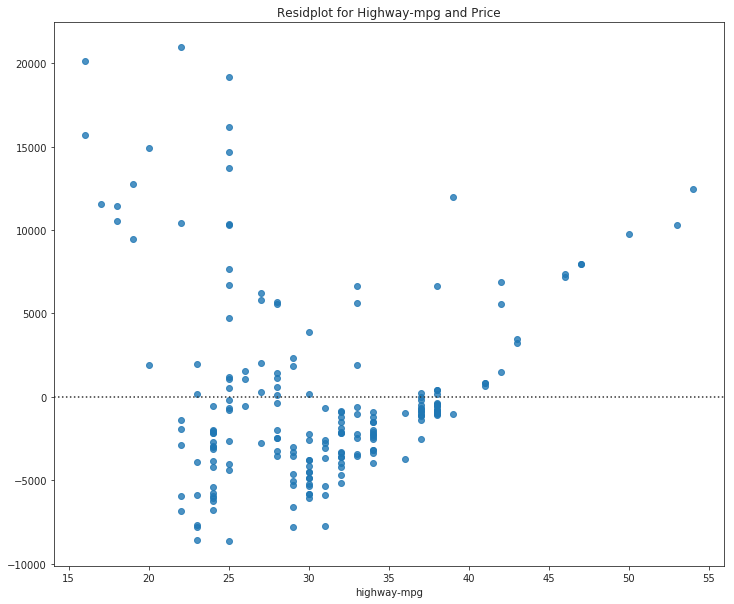

In [ ]:
plt.figure(figsize=(12,10))
plt.title('Residplot for Highway-mpg and Price')
sns.residplot(adjusted_df['highway-mpg'], target)
plt.show()

<h3><u>Distribution Plots:</u></h3>  
    
   **Distplots count the predicted values versus the actual values.**  
   **Distplots are extremely useful for visualizing models with morethan one independent variable or feature** 

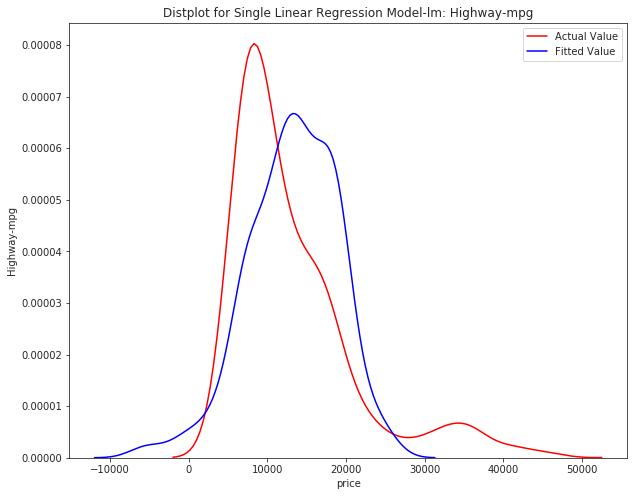

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Distplot for Single Linear Regression Model-lm: Highway-mpg')
plt.ylabel('Highway-mpg')
ax1 = sns.distplot(adjusted_df['price'], hist=False, color='r', label='Actual Value')
sns.distplot(Yhat, hist=False, color='b', ax = ax1, label='Fitted Value')

_**The Distplot above for SLR has no values for car price from 30000 - 50000. This suggests that either a Non-linear model may be suitable for the model or we simply need more data to make the model more accurate.**_

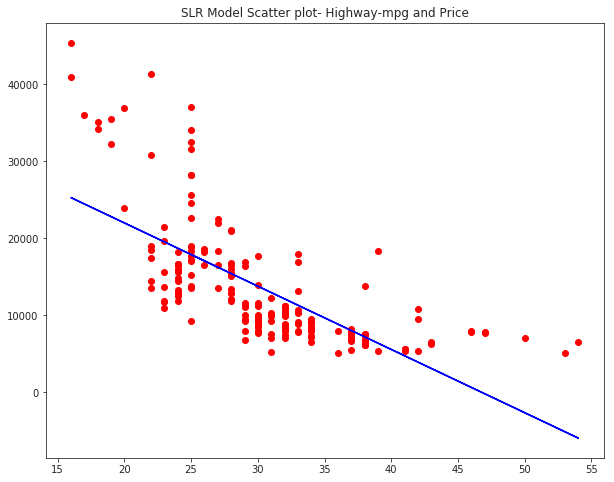

In [ ]:
plt.figure(figsize=(10,8))
plt.title('SLR Model Scatter plot- Highway-mpg and Price')
plt.scatter(X,Y, color = 'r')
plt.plot(X, Yhat, color='b')
plt.show()

(0, 48264.00707227395)

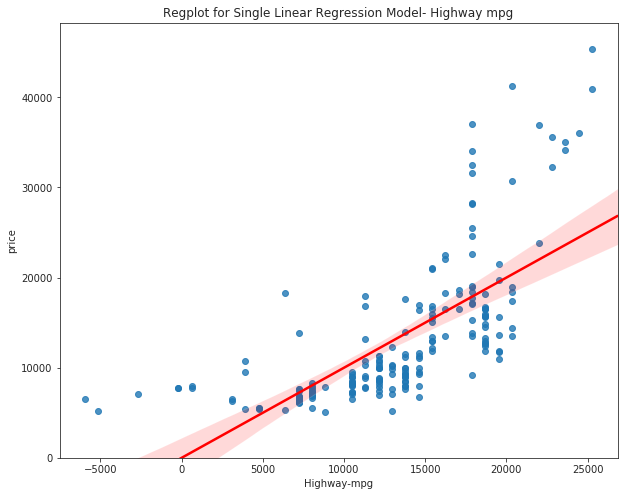

In [ ]:
#First set the size,title and labels
plt.figure(figsize=(10,8))
plt.title('Regplot for Single Linear Regression Model- Highway mpg')
plt.xlabel('Highway-mpg')

# next let's convert Y from a dataframe to a pandas series so we can fit it in the regplot
Yh = Y.squeeze()

# Then plot using regplot
sns.regplot(Yhat, Yh , line_kws={'color':'red', 'linewidth':2.5})

plt.ylim(0,)

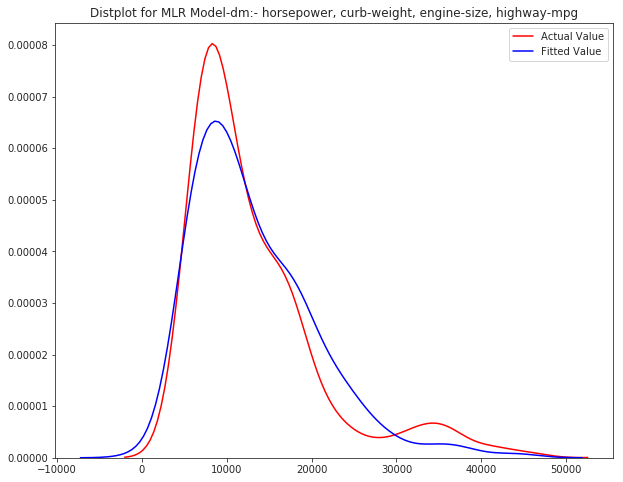

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Distplot for MLR Model-dm:- horsepower, curb-weight, engine-size, highway-mpg')
ax1 = sns.distplot(target, hist=False, color='r', label='Actual Value')
sns.distplot(y_hat, hist=False, color='b', ax = ax1, label='Fitted Value')

(0, 52410.725281170555)

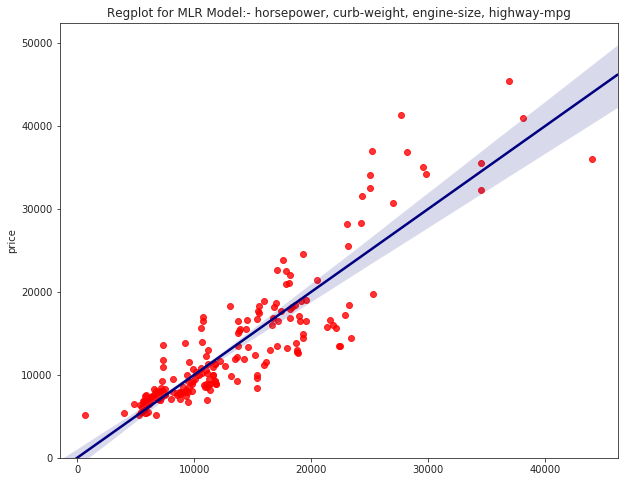

In [ ]:
#First set the size,
plt.figure(figsize=(10,8))
plt.title('Regplot for MLR Model:- horsepower, curb-weight, engine-size, highway-mpg')

# next let's convert target from a dataframe to a pandas series, so we can fit it in the regplot
Yh = target.squeeze()

# Then plot using regplot
sns.regplot(y_hat, Yh, color='r', line_kws={'color':'navy','linewidth':2.5})

plt.ylim(0,)

<u><h3>Polynomial Regression and Pipelines</h3></u>  

What do we do when a linear model is not the best fit for our data?  
We transform our data into a <b>Polynomial</b>, then use linear regression to fit the parameter.

<b>Pipelines</b> are a way to simplify our code

<b>Polynomial</b> regression is a special case of linear regresion. This method is better fit for describing curvilinear relations. <b>A Curvilinear relationship</b> is what we get by squaring or setting higher order terms for the predictor variables, transforming the data. 

<u><h4>Common types of Polynomial Regression Models:<h4></u>
    <b>1. Quadratic model:</b>   
    $y^$  =  $b_0 + b_1x^2 + b_2x^2.$
    
    
_This means the predictor variable is Squared in the model. This is a Second order Polynomial Regression._
    
  
   <b>2. Cubic model:</b>   
    $y^$  =  $b_0 + b_1x^2 + b_2x^2 + b_3x^3.$
    
    
_This means the predictor variable is Cubed in the model. This is a Third Order Polynomial Regression._


<b>3. Higher Order:</b>   
    $y^$  =  $b_0 + b_1x^2 + b_2x^2 + b_3x^3 +...$
    
    
_There also exists Higher Order Polynomial Regression, when a good fit hasn't been achieved by 2nd or 3rd Order ._
    
    


**The degree of the regression makes a big difference and can result in a better fit if we pick the right value.**  
**In all cases, the relationship between the variable and the parameters or coefficients is always linear.**

<h3>PLR Model for Highway-mpg and Price</h3>

<h4>Approach_One</h4>

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=6)
poly

PolynomialFeatures(degree=6, include_bias=True, interaction_only=False)

In [ ]:
# remember we defined highway-mpg as X before, so we just use it here

X_poly = poly.fit_transform(X)

In [ ]:
# Let's now create a new Linear Regression Model

lm3 = LinearRegression()

In [ ]:
# let's train the new linear model with the polynomial features of X the predictor variable and Y the target

lm3.fit(X_poly, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
result = lm3.predict(X_poly)

<h4>Visualizing PLR model Distplot of Highway-mpg and Price</h4>

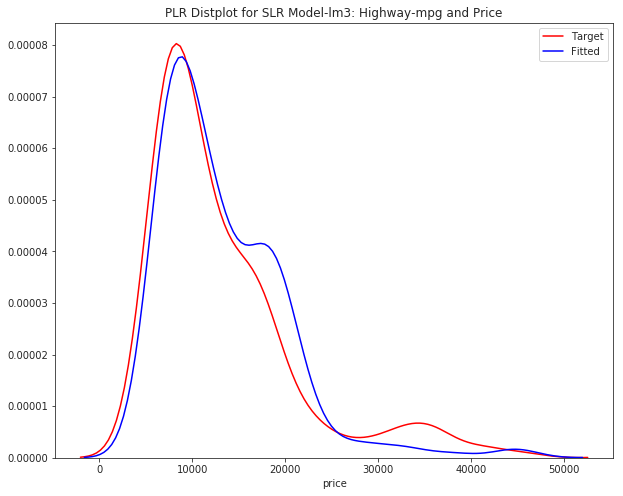

In [ ]:
plt.figure(figsize=(10,8))
plt.title('PLR Distplot for SLR Model-lm3: Highway-mpg and Price')
ax1 = sns.distplot(Y, hist=False, color='r', label='Target')
sns.distplot(result, hist=False, color='b', label='Fitted', ax=ax1)
plt.show()

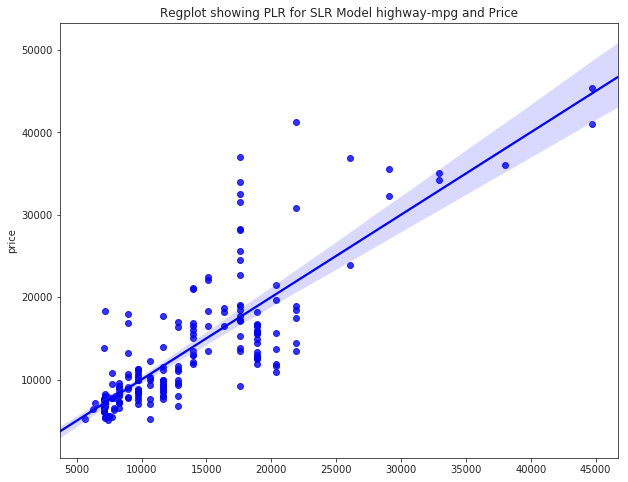

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Regplot showing PLR for SLR Model highway-mpg and Price')
Yh = Y.squeeze()
sns.regplot(result,Yh,color='b')
plt.show()

In [ ]:
lm3.score(X_poly,Y)

0.6819542423719372

<h4>Approach_Two</h4>

In [ ]:
# First, let's look at the highway-mpg stats once again

adjusted_df[['highway-mpg']].describe()

,highway-mpg
count,201.000000
mean,30.686567
std,6.815150
min,16.000000
25%,25.000000
50%,30.000000
75%,34.000000
max,54.000000


In [ ]:
# Let's set the poly method

def plotpoly(model, predictors,target, name):
    x_new = np.linspace(15,55,100)
    y_new = model(x_new)
    
    plt.figure(figsize=(8,6))
    plt.plot(predictors, target,'.', x_new, y_new,'--')
    plt.title("Polynomial Fit for Highway-mpg and Price")
    ax = plt.gca()
    ax.set_facecolor((0.890, 0.890, 0.890))
    #fig = plt.gcf()
    plt.xlabel(name)
    plt.ylabel('Price of Cars')
    
    plt.show()
    plt.close()

In [ ]:
# Let's set the variables

X = adjusted_df['highway-mpg']
Y = adjusted_df['price'] 

Let's fit the polynomial using the function <b>polyfit</b>, then use the function <b>poly1d</b> to display the polynomial function.

In [ ]:
# Here we use a polynomial of the third order- cubic model.

f = np.polyfit(X,Y,6)
p = np.poly1d(f)

print(p)

           6          5         4         3             2
0.0007207 x - 0.1559 x + 13.69 x - 625.9 x + 1.575e+04 x - 2.088e+05 x + 1.171e+06


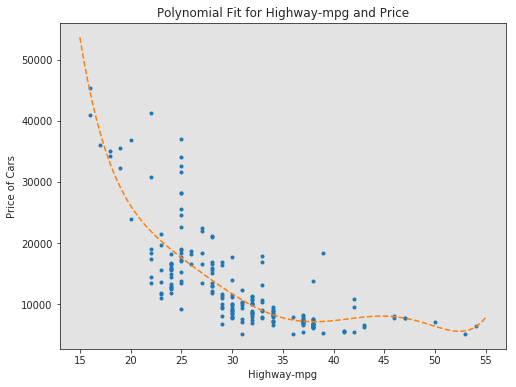

In [ ]:
# Let's plot the function

plotpoly(p, X, Y, 'Highway-mpg')

<h3>PLR for MLR</h3>

In [ ]:
# First let's create a polynomial feature model

Mpoly = PolynomialFeatures(degree=4)
Mpoly

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)

In [ ]:
# lets confirm the shape of the predictor or independent variable before polynomially fitting it

predictors.shape

(201, 4)

In [ ]:
# Let's fit it and confirm the shape

predict_fit= Mpoly.fit_transform(predictors)
predict_fit.shape

(201, 70)

In [ ]:
lm4 = LinearRegression()

In [ ]:
lm4.fit(predict_fit, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
mlr_result = lm4.predict(predict_fit)

<h4>PLR for MLR Visualization</h4>

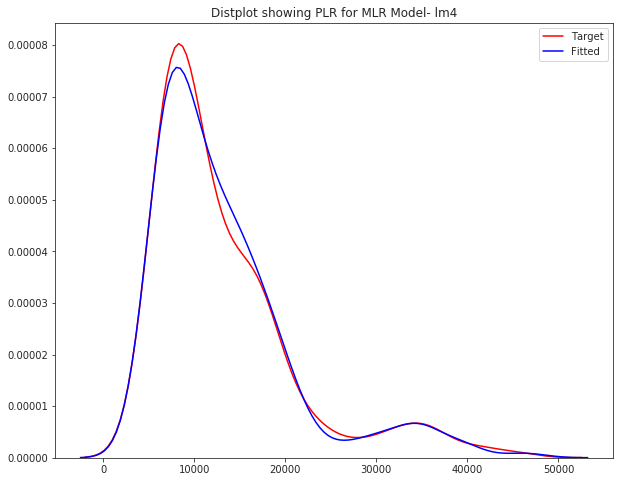

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Distplot showing PLR for MLR Model- lm4')
ax1 = sns.distplot(target, hist=False, color='r', label="Target")
sns.distplot(mlr_result, hist=False, color='b', label='Fitted', ax=ax1)
plt.show()

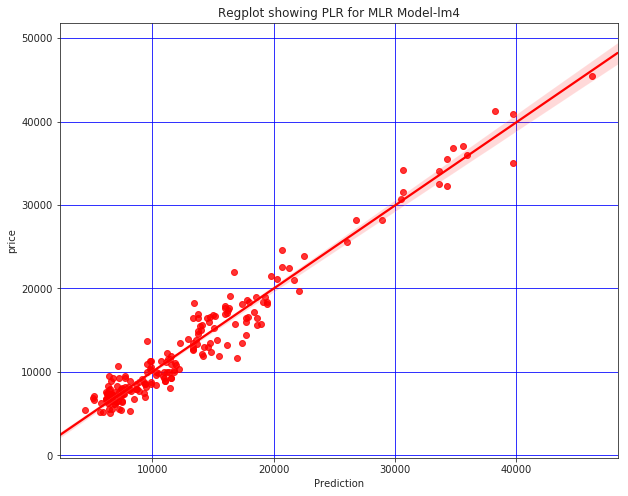

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Regplot showing PLR for MLR Model-lm4')
plt.xlabel('Prediction')
plt.grid(color='b')

# Let's flatten mlr_result and target to 1-D to fit into the Regplot.
yp = mlr_result.squeeze()
tg = target.squeeze()

sns.regplot(yp, tg, color = 'r')
plt.show()

<h3>Prediction and Decision Making</h3>  
How can we deduce if our Model is correct?   
To determine final best fit, we do the following, 

    1. Determine that our Model results actually make sense.  
    2. Use Visualization  
    3. Use Numerical measures for evaluation  
    4. Compare Models

In [ ]:
# For example using the Simple Linear Regression Model, lets view a specific result

x = [30]
x = pd.DataFrame(x)
x

,0
0,30


In [ ]:
# Now let's pass x as a predictor variable to our SLR Model lm.

lm.predict(x)

array([13771.3045085])

In [ ]:
# Let's check the coef or slope again of our Model lm
lm.coef_

array([-821.73337832])

The result 13771.30 above seems a fair result. For example the value is not negative, extremely high or extremely low.  
If we recall the expression for SLR from above <h3>$y = b_0 + b_1x$</h3>  
_This means that Price ($y^$) = 38423.31 - 821.73 * highway-mpg._  
The coefficient or slope ($-821.73$) corresponds to the multiple of the highway-mpg feature.  
**As such, an increase in 1(one) unit of highway-mpg would result to a decrease in car price by approximately $821.73.**

<h3>Pipelines:</h3><br>Data Pipelines simplify the steps of processing the data. We use the module <b>Pipeline</b> to create a pipeline. We also use <b>StandardScaler</b> as a step in our pipeline.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

<h5>We create the pipeline, by creating a list of tuples including the name of the model or estimator and its corresponding constructor.</h5>

In [ ]:
input = [('scale',StandardScaler()),('Poly',PolynomialFeatures(include_bias=False,degree=4)),('model',LinearRegression())]

<h5>we input the list as an argument to the pipeline constructor</h5>

In [ ]:
pipe = Pipeline(input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('Poly', PolynomialFeatures(degree=4, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

<h5>We can normalize the data, perform a transform and fit the model simultaneously.</h5>

In [ ]:
pipe.fit(predictors,target)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('Poly', PolynomialFeatures(degree=4, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

<h5>Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously</h5>

In [ ]:
ypipe = pipe.predict(predictors)
ypipe[:5]

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([[12928.99045666],
       [12928.99045666],
       [18022.58993052],
       [12688.01094654],
       [16758.47834554]])

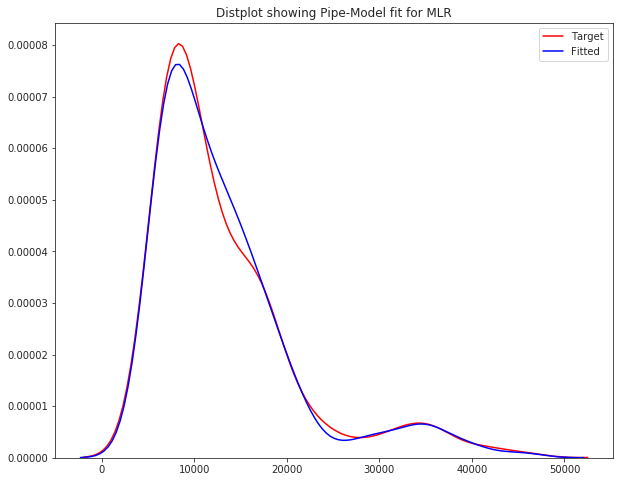

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Distplot showing Pipe-Model fit for MLR')
ax1 = sns.distplot(target, hist=False, label='Target', color='r')
sns.distplot(ypipe, hist=False, label='Fitted', color='b', ax=ax1)


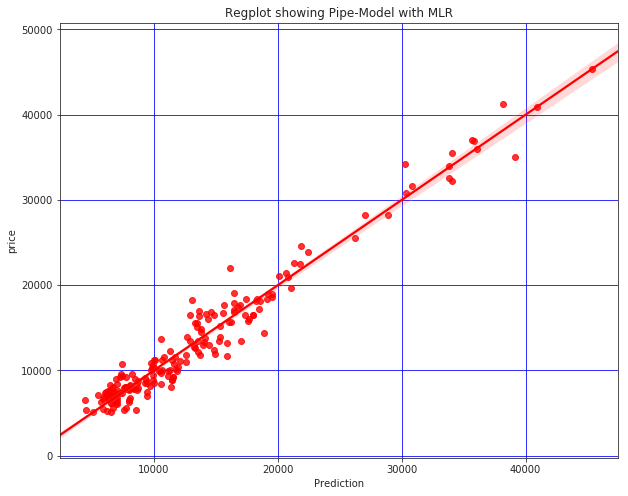

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Regplot showing Pipe-Model with MLR')
plt.xlabel('Prediction')
plt.grid(color='b')

# Let's flatten ypipe and target to 1-D to fit into the Regplot.
yp = ypipe.squeeze()
tg = target.squeeze()

sns.regplot(yp, tg, color = 'r')
plt.show()

<h3>Measures for In-Sample Model Evaluation</h3>  

These measures are a way to numerically measure how good the model fits on our data set.  
<u>Two important measures to determine the fit of a Model are:</u>  
<b>Mean Squared Error (MSE):</b>  
    To find the MSE, we calculate the differnce between $y$ and $y^$ for all data points in our model prediction. Then we square each difference and sum all the differences and divide that sum by the number of data points or samples predicted.  
<b>R-Squared $(R^2)$:</b>  
    This is also called the coefficient of determination. It's a measure to determine how close the original data is to the fitted regression line. Think about it as comparing a regression model to a simple model of the mean of the data points.  
    If the variable(s) is a good predictor, then our model should perform better than just the mean. For the most part, it returns values between 0 and 1.  
    If $R^2$ is negative, it is a possible indication of over-fitting the model.  
    <b>The closer to 1, the better the model fit and Vice-versa</b>.  
    <h3>$R^2$ = $(1 - \frac{MSE-of-Regression-Line}{MSE-of-The-Average-of-The-Data})$</h3> 

RESIDUAL VARIANCE AND R-SQUARE<br>
R-Square, also known as the Coefficient of determination is a commonly used statistic to evaluate model fit. R-square is 1 minus the ratio of residual variability. When the variability of the residual values around the regression line relative to the overall variability is small, the predictions from the regression equation are good. For example, if there is no relationship between the X and Y variables, then the ratio of the residual variability of the Y variable to the original variance is equal to 1.0. Then R-square would be 0. If X and Y are perfectly related then there is no residual variance and the ratio of variance would be 0.0, making R-square = 1. In most cases, the ratio and R-square will fall somewhere between these extremes, that is, between 0.0 and 1.0. This ratio value is immediately interpretable in the following manner. If we have an R-square of 0.4 then we know that the variability of the Y values around the regression line is 1-0.4 times the original variance; in other words we have explained 40% of the original variability, and are left with 60% residual variability. Ideally, we would like to explain most if not all of the original variability. The R-square value is an indicator of how well the model fits the data (e.g., an R-square close to 1.0 indicates that we have accounted for almost all of the variability with the variables specified in the model).
[link](http://www.statsoft.com/Textbook/Multiple-Regression)

Predicted Values and Residuals<br>
	A predicted value is calculated as $^yi=b0+b1xi,1+b2xi,2+…$, where the b values come from statistical software and the x-values are specified by us.<br>
	A residual (error) term is calculated as $ei=yi−yi_{hat}$, the difference between an actual and a predicted value of y.<br>
	A plot of residuals versus predicted values ideally should resemble a horizontal random band. Departures from this form indicates difficulties with the model and/or data.<br>
	Other residual analyses can be done exactly as we did in simple regression. For instance, we might wish to examine a normal probability plot (NPP) of the residuals. <br>Additional plots to consider are plots of residuals versus each x-variable separately. This might help us identify sources of curvature or nonconstant variance.[link](https://newonlinecourses.science.psu.edu/stat501/node/311/)



<h3>To find the MSE in Python...</h3>

In [ ]:
# first import mean_squared_error from sklearn

from sklearn.metrics import mean_squared_error

In [ ]:
# Lets apply the MSE to the prediction for SLR

error_lm = mean_squared_error(target, Yhat)
error_lm

31635042.944639888

In [ ]:
# Lets apply the MSE to the prediction for SLR using PLR

error_lm3 = mean_squared_error(Y, result)
error_lm3

19986521.828300446

In [ ]:
# Lets apply the MSE to the prediction for MLR 

error_dm = mean_squared_error(target, y_hat)
error_dm

11971078.721508587

In [ ]:
# Let's apply the MSE to the prediction for MLR using PLR

error_lm4 = mean_squared_error(target, mlr_result)
error_lm4

2771433.279109169

In [ ]:
pipe_error = mean_squared_error(target, ypipe)
pipe_error

2505507.199076078

<h3>To find $R^2$ in Python...</h3>  
    <b>We use the .score() method on our model to find the R squared. Then pass to it our variable or variables and the actual target</b>

In [ ]:
# To calculate coefficient of determination for SLR model

lm.score(X,Y)

ValueError: ignored

In [ ]:
# To calculate coefficient of determination for SLR model using PLR

lm3.score(X_poly,Y)

In [ ]:
# To calculate the coeefficient of determination for MLR model

dm.score(predictors, target)

In [ ]:
# to calculate the coefficient of drtermination for MLR model using PLR

lm4.score(predict_fit, target)

In [ ]:
pipe.score(predictors,target)

<font color='red'><h4>We can clearly see that so far, The Model with the <font color='blue'>least MSE and Most $R^2$</font> is model <font color='black'>lm4</font>. No doubt, the best model at the moment.</h4></font>

In [ ]:
test = np.empty([5,3])
chart = pd.DataFrame(test, columns=['Model-Name','MSE', "R-Squ'd"])
chart['Model-Name'] = ['lm','lm3','dm','lm4','pipe']
chart['MSE'] = [31635042.944639895,19986521.832416017,11971078.721508589,2775223.6246514544,2505507.199076076]
chart["R-Squ'd"] = [0.4965911884339175,0.6819542423064463,0.8095040830858192,0.955837833722536,0.9601298343844714]
chart['MSE'] = np.round(chart['MSE'].astype('float64'),2)
chart["R-Squ'd"] = np.round(chart["R-Squ'd"].astype('float64'),4)
chart.sort_values('MSE',ascending=True,inplace=True)
chart.sort_values("R-Squ'd",ascending=False,inplace=True)
chart.index=[1, 2, 3, 4, 5]
chart['Model-Type'] = ['Pipe Model','MLR + PLR','MLR','SLR + PLR', 'SLR']


<h4>See a Summary Table of the Top-Performing Linear Regression Models we created</h4>

In [ ]:
chart

<h4><font color='red'>Well after increasing the PolyFeat degree in Pipe-Model to 4, it surpasses the MLR-PLR model which is also at 4 degrees. And performs better in both MSE and $R^2$... Although the difference is very small... Thus The Pipe model is the current best</font></h4>

<h3>Summary:</h3>  
    Comparing SLR and MLR, a lower MSE does not always imply a better fit in every situation.
    <br>
    MSE for an MLR model will be smaller than MSE for SLR model since the errors of the data would decrease as more variables are included in the model.<br> Also MSE for a Polynomial Regression Model would be smaller than a Linear Regression Model.<br>
    A similar inverse relationship holds for $R^2$ too.
    

<b>Comparing these five models, we conclude that the Pipe model is the best model to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.The second best is The MLR+PLR Model</b>

<h3>Model Exercises</h3>

<h4>Question 1</h4>

In [ ]:
# create a Linear regression object

lm1 = LinearRegression()

In [ ]:
# Train the model using engine size as independent variable and price as dependent variable

xx = adjusted_df[['engine-size']]
yy = adjusted_df['price']

lm1.fit(xx,yy)

In [ ]:
# find the slope and intercept of the model

slope = lm1.coef_
slope

In [ ]:
# intercept

intcpt = lm1.intercept_
intcpt

**What is the equation of the predicted line?**  
    <h4>$y^$ $= b_0 + b_1x_1$</h4><br> **yhat = -7963.34 + 166.86 * engine-size**

<h4>Question 2</h4>

In [ ]:
# create and train a MLR model where the response variable is Price and the predictor variables are normalized losses and 
# Highway-mpg

lm2 = LinearRegression()

In [ ]:
adjusted_df['normalized-losses'].unique()

In [ ]:
x = adjusted_df['normalized-losses'] == '?'
y = adjusted_df[x]
y

# This shows there are 37 missing values in normalised-losses column alone, that's quite some.

In [ ]:
# let's convert them to zero and convert the column to int64

adjusted_df['normalized-losses'].replace('?','0',inplace=True)

# let's finally convert the column normalized losses from object to int
adjusted_df['normalized-losses'] = adjusted_df['normalized-losses'].astype('int64')

In [ ]:
# lets set the predictors and response variables.

ex = adjusted_df[['normalized-losses','highway-mpg']]
wy = adjusted_df['price']

# train the model

lm2.fit(ex,wy)

In [ ]:
# intercept
lm2.intercept_

In [ ]:
# slope
lm2.coef_

In [ ]:
adjusted_df.to_csv('adjusted_df.csv')